## Using the built-in scikit learn dataset to perform multivariate linear regression

### Step 1: Importing tools and loading data

In [18]:
#imports for basic python libraries

import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [19]:
# imports for plotting and data visualization

import matplotlib.pyplot as plt
import seaborn as sns

#changes the background of the seaborn plots to a white grid
sns.set_style('whitegrid') 

#allows you to view the plots as outputs within the notebook
%matplotlib inline 

In [20]:
#import for loading the built-in scikitlearn dataset - Boston Housing

from sklearn.datasets import load_boston

In [21]:
#load the data and save as "boston"

boston = load_boston()

In [22]:
print boston.DESCR #this command ONLY works with built-in sklearn datasets! It describes the data set

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [23]:
#convert the dataset to a pandas dataframe (which converts it to a "table" format)

boston_df = DataFrame(boston.data)

#specify the column names, which are available as a separate variable called feature_names  
boston_df.columns = boston.feature_names

#show the first 5 rows of the dataset (default when you call head.() but you can change it) 
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [24]:
#the dataset provides the target variable (Price) as a separate variable called target
#create a new column "Price" in the dataframe to put the target variable so everything is in one dataframe

boston_df['Price'] = boston.target

#show the dataframe to make sure it worked

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Step 2: Data Visualization

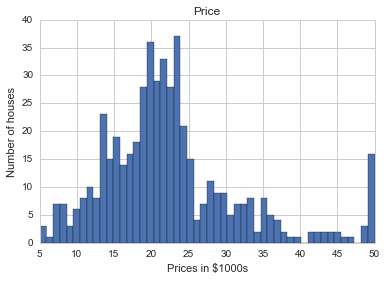

In [25]:
#Visualize the distribution of the dataset using histograms

boston_df.hist('Price',bins = 50)

plt.xlabel('Prices in $1000s')
plt.ylabel('Number of houses')

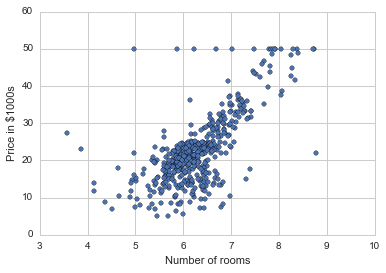

In [26]:
#create a scatterplot with one of the features (RM) to see how it related to the target (Price)

boston_df.plot(kind='scatter', x='RM', y='Price');

plt.ylabel('Price in $1000s')
plt.xlabel('Number of rooms')

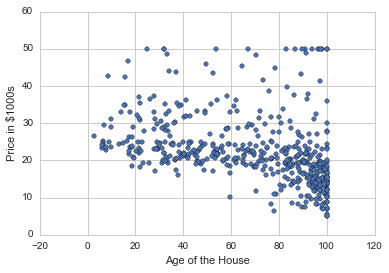

In [27]:
#another variable that might be relevant (Age of the House)

boston_df.plot(kind='scatter', x='AGE', y='Price');

plt.ylabel('Price in $1000s')
plt.xlabel('Age of the House')

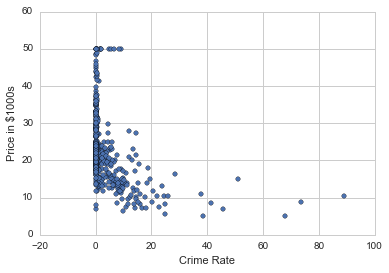

In [28]:
#maybe crime rate is also important

boston_df.plot(kind='scatter', x='CRIM', y='Price');

plt.ylabel('Price in $1000s')
plt.xlabel('Crime Rate')

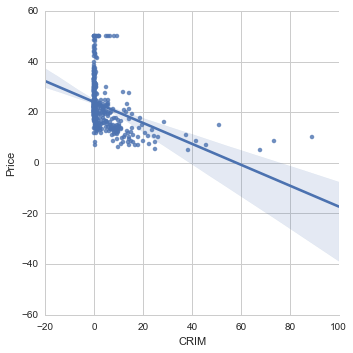

In [29]:
# seaborn has a very handy function called "lmplot" to quickly visualize the "best fit" line

sns.lmplot('CRIM','Price',data=boston_df)

###Step 3: Model Fitting using statsmodels 

In [33]:
# import linear regression from statsmodels

import statsmodels.api as sm

In [34]:
# specify independent variables (features) and dependent variable (target)
# here I assumed that all of the features would be important for the target, but you can plot each feature separately
# and visualize how it relates to the target before using them in the model

# choose all features from the dataframe except for Price 
X = boston_df.drop('Price',1)
X = sm.add_constant(X)

# define your target variable as Price
Y = boston_df.Price

In [38]:
lreg1 = sm.OLS(Y,X).fit()

# print the coefficients
lreg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 13 May 2015   Prob (F-statistic):          6.95e-135
Time:                        13:46:45   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.000        26.462    46.520
CRIM          -0.1072      0.033     -3.276      0.001        -0.171    -0.043
ZN             0.0464      0.014      3.380      0.001         0.019     0.073
INDUS          0.0209      0.061      0.339      0.735        -0.100     0.142
CHAS           2.6886      0.862      3.120      0.002         0.996     4.381
NOX          -17.7958      3.821     -4.658      0.000       -25.302   -10.289
RM             3.8048      0.418      9.102      0.000         2.983     4.626
AGE            0.0008      0.013      0.057      0.955        -0.025     0.027
DIS           -1.4758      0.199     -7.398      0.000        -1.868    -1.084
RAD            0.3057      0.066      4.608      0.000         0.175     0.436
TAX           -0.0123      0.004     -3.278      0.001        -0.020    -0.005
PTRATIO       -0.9535      0.131     -7.287      0.000        -1.211    -0.696
B              0.0094      0.003      3.500      0.001         0.004     0.015
LSTAT         -0.5255      0.051    -10.366      0.000        -0.625    -0.426
==============================================================================
Omnibus:                      178.029   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.015
Skew:                           1.521   Prob(JB):                    1.54e-170
Kurtosis:                       8.276   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From this summary, we can see that given the presence of the other features, the AGE of the house and INDUS (proportion of non-retail business in the area) are not significantly related to the price of the house. So, we can drop them and see if our r-squared value increases. 

### Step 4: Model Fitting using scikit-learn 

In [39]:
# import linear regression from sklearn

import sklearn
from sklearn.linear_model import LinearRegression

In [48]:
X2 = boston_df.drop(['Price','INDUS', 'AGE'],axis=1)

feature_cols = X2.columns

X2.head()

,CRIM,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18,0,0.538,6.575,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,0,0.469,6.421,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,0,0.469,7.185,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,0,0.458,6.998,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,0,0.458,7.147,6.0622,3,222,18.7,396.90,5.33


In [49]:
# specify the variable name that you want to use to run the Linear Regression

lreg2 = LinearRegression()

In [50]:
# use the fit function in the linear regression model to fit the data 

lreg2.fit(X2,Y)

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

In [51]:
# print the intercept and slope

print 'intercept: %.2f ' % lreg2.intercept_

intercept: 36.37 


In [53]:
# show the beta estimates for each of the features and save them in a dataframe 

zip(feature_cols, lreg2.coef_)

[('CRIM', -0.10755824819512304),
 ('ZN', 0.045804356485666164),
 ('CHAS', 2.7212072009479211),
 ('NOX', -17.395641600832704),
 ('RM', 3.796649796632547),
 ('DIS', -1.49336040513861),
 ('RAD', 0.29908967972411205),
 ('TAX', -0.011764034143318024),
 ('PTRATIO', -0.94711225233900853),
 ('B', 0.0093724517105779077),
 ('LSTAT', -0.52317172260881883)]

In [55]:
lreg2.score(X2,Y)

0.74054535204614425

Note that the r-sqaured value didn't change much even after removing two non-significant parameters from the model. This could also be because r-squared will always do better when you have more parameters. So, it could be that the r-squared value was also 0.74 in the first model (even though the parameters weren't significant) simply because it had two more parameters than the second model. For the cross-validation and prediction steps, I will choose model 2. 

### Step 5: Model Prediction

In [56]:
# sklearn already has a cross-validation function to split up the data into training and testing
# based on the size of the data set, it automatically chooses the ratio of training and testing data
# all you have to do is specify what the features and target variables are called

feature_train,feature_test,target_train,target_test = sklearn.cross_validation.train_test_split(X2,Y)

In [57]:
# print the size of the training and testing data to make sure it worked

print feature_train.shape, feature_test.shape, target_train.shape , target_test.shape

(379, 11) (127, 11) (379,) (127,)


In [58]:
# call the linear regression function again, except this time you ONLY fit the training data 

lreg2 = LinearRegression()

lreg2.fit(feature_train,target_train)

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

In [59]:
# call the predict function to see how well the model can predict the training data, but more importantly the testing data
pred_train = lreg2.predict(feature_train)
pred_test = lreg2.predict(feature_test)

In [60]:
# calculate and print the mean square error for the training and testing data. These should look similar! 

# MSE for training data
print("Residual sum of squares: %.2f"
      % np.mean((target_train - pred_train) ** 2))

# MSE for testing data
print("Residual sum of squares: %.2f"
      % np.mean((target_test - pred_test) ** 2))

Residual sum of squares: 21.40
Residual sum of squares: 24.16


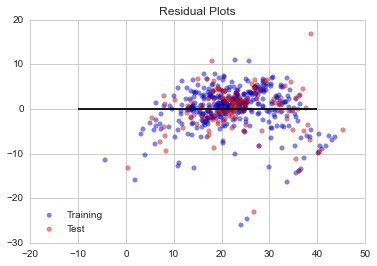

In [61]:
# Plot the residuals of training and testing data. These should be evenly distributed above and below the line. 
# if they are not evenly distributed then linear regression model would not a good choice for the dataset 

train = plt.scatter(pred_train,(pred_train - target_train),c='b',alpha=0.5)

test = plt.scatter(pred_test,(pred_test-target_test),c='r',alpha=0.5)

plt.hlines(y=0,xmin=-10,xmax=40)

plt.legend((train,test),('Training','Test'),loc='lower left')

plt.title('Residual Plots')

In [63]:
# calculate and print the explained variance score (r-squared): 1 is perfect prediction

print('Variance score: %.2f' % lreg2.score(feature_test, target_test))

Variance score: 0.73


The prediction test score is as good as the training score! 